In [1]:
import pandas as pd

In [2]:
!pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.1 MB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.9 MB/s eta 0:00:00


In [3]:
from Bio import SeqIO

In [18]:
viroids = pd.DataFrame()
IDs=[]
Seqs=[]

for row in SeqIO.parse('../raw_data/viroids.fasta','fasta'):
    IDs.append(row.id)
    Seqs.append(row.seq)
    
viroids['ID'] = IDs
viroids['Sequence'] = Seqs
viroids['IsViroid'] = 1

In [19]:
viruses = pd.DataFrame()
IDs=[]
Seqs=[]

for row in SeqIO.parse('../raw_data/virus.fasta','fasta'):
    IDs.append(row.id)
    Seqs.append(row.seq)
    
viruses['ID'] = IDs
viruses['Sequence'] = Seqs
viruses['IsViroid'] = 0

In [23]:
len(viruses) + len(viroids)

19397

In [24]:
df_final = viroids.merge(viruses, how="outer")

In [39]:
seqs=[]
for seq in df_final['Sequence']:
    seq = str(seq)
    seqs.append(seq)
df_final['Sequence'] = seqs

In [45]:
df_final['Length'] = [len(df_final['Sequence'][i]) for i in range(len(df_final))]
df_final

,ID,Sequence,IsViroid,Length
0,NC_039241.1,GGGTGGTGTGTGCCACCCCTGATGAGACCGAAAGGTCGAAATGGGG...,1,333
1,NC_003540.1,GGCACCTGACGTCGGTGTCCTGATGAAGATCCATGACAGGATCGAA...,1,399
2,NC_003636.1,GTCATAAGTTTCGTCGCATTTCAGCGACTCATCAGTGGGCTTAGCC...,1,337
3,NC_001410.1,TTTATTAGAACAAGAAGTGAGGATATGATTAAACTTTGTTTGACGA...,1,247
4,MW046337.1,CCCGATAGAAAGGCTAAGCACCTCGCAATGACGTAAGGTGGGACTT...,1,339
...,...,...,...,...
19392,MF066697.1_282_203,GCGGAGTTCCACATCGGCGGACGCGACGACATACGATTGTGTGCCG...,0,282
19393,AY624020.1_401_15,GCTTAGGCATTTTGAATTAAATCCAGTGGGCCAAAGCCTCTTTAAT...,0,401
19394,MW574021.1_304_437,CATCCCTAAGGGATGTGTTGGTCCCTGTAAGGTACAGGATTACGAA...,0,304
19395,KP313717.1_404_119,CCCAGGATCTATCGGACGTTGAGGACGCCTGATGTTCCAAGAGGTT...,0,404


<AxesSubplot:>

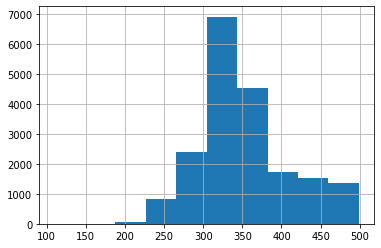

In [48]:
df_final['Length'].hist()

In [49]:
df_final.to_csv('../data/df_final.csv')